In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

## Comics and Gender Representation

This data was downloaded from Kaggle and was scraped from the [Marvel Wikia](https://marvel.fandom.com/wiki/Marvel_Database) and [DC Wikia](https://dc.fandom.com/wiki/DC_Comics_Database) webistes. It focuses on data surrounding comic book characters, and includes data ranging from character specific qualities such as gender, sexual orientation, and if they have a secret identity to quantitative data such as the year the character was introduced and their total number of appearances. 

I'm interested to learn if this dataset has any trends as it relates to the characters' gender and if it represents society at large or a smaller subset of the population.

In [2]:
#load the two data frames
marvel_df = pd.read_csv('capstone_data/marvel-wikia-data.csv')
dc_df = pd.read_csv('capstone_data/dc-wikia-data.csv')

#convert marvel_df 'Year' to match dc_df 'YEAR' so the merge works correctly
marvel_df.rename(columns={'Year' : 'YEAR'}, inplace=True)

#Combine both dfs and confirm they merged correctly
df = pd.concat([marvel_df, dc_df], sort=False).reset_index()
df.head()

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
len(marvel_df) + len(dc_df) == len(df)

True

Looks like the merge worked as intended. Let's start inspecting the data.

In [4]:
df.describe()

,index,page_id,APPEARANCES,YEAR
count,23272.000000,23272.000000,21821.000000,22388.000000
mean,6782.934857,254956.821932,19.009303,1986.420046
std,4646.041791,231417.093079,93.814040,18.972698
min,0.000000,1025.000000,1.000000,1935.000000
25%,2908.750000,31385.750000,1.000000,1976.000000
50%,5817.500000,192263.500000,4.000000,1990.000000
75%,10557.250000,456337.750000,10.000000,2001.000000
max,16375.000000,755278.000000,4043.000000,2013.000000


In [5]:
df.SEX.value_counts()

Male Characters           16421
Female Characters          5804
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64

__A few of noticings right off the bat:__

1) It looks like half of new characters had their first appearance between 1990-2013.

2) Only the top 25% of characters have more than 10 appearances, and the number of appearances is quite varied. It could be worthwhile to look at only the most popular characters.

3) There is a substantially larger amount of male characters than all other genders combined.



### 1. How many new characters have been released every year?

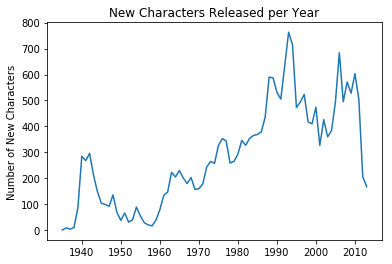

In [6]:
#create an analysis of all new characters by year
new_characters_per_year = df.YEAR.value_counts()
#make a line chart by year
plt.plot(new_characters_per_year.sort_index())
plt.title('New Characters Released per Year')
plt.ylabel('Number of New Characters')
plt.show()

There is definitely a gradual trend upwards from the 1960's to the 1990's with a good amount of volatility in the years after. 

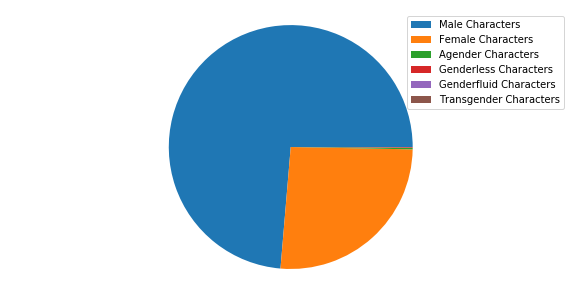

In [7]:
#Let's look at how each gender is represented in our data set
gender_percents = df.SEX.value_counts()
plt.figure(figsize=(10, 5))
plt.pie(gender_percents)
plt.axis('equal')
plt.legend(gender_percents.index)
plt.show()

It looks like nearly 75% of all characters are male. The rest appear to be female; we wouldn't even know there were other groups represented in this chart without the legend. I wonder if there are patterns by year of the different genders.

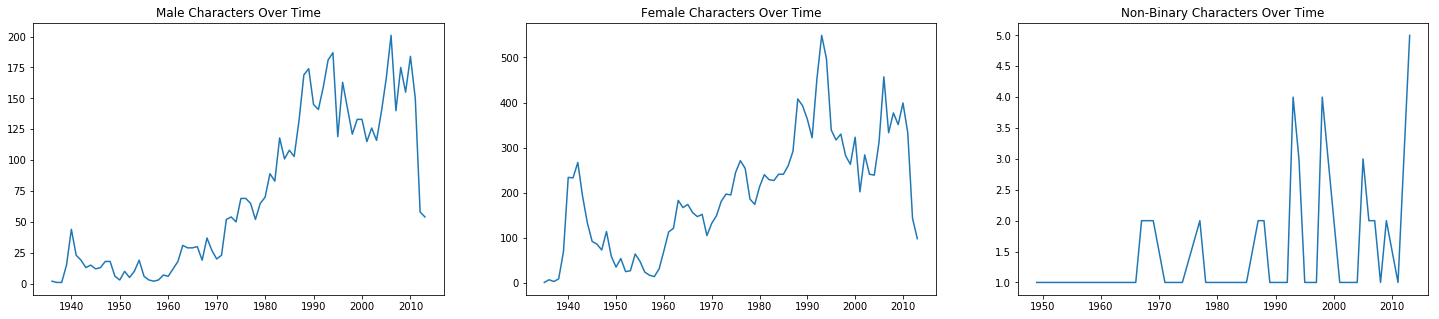

In [8]:
#split the data by their group
female_characters = df.loc[df.SEX == 'Female Characters']
male_characters = df.loc[df.SEX == 'Male Characters']
#Note that the last boolean in this call will remove any NaN values
non_binary_characters = df.loc[(df.SEX != 'Male Characters') & (df.SEX != 'Female Characters') & df.SEX]

#plot all three side by side
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.plot(female_characters.YEAR.value_counts().sort_index())
plt.title('Male Characters Over Time')

plt.subplot(1, 3, 2)
plt.plot(male_characters.YEAR.value_counts().sort_index())
plt.title('Female Characters Over Time')

plt.subplot(1, 3, 3)
plt.plot(non_binary_characters.YEAR.value_counts().sort_index())
plt.title('Non-Binary Characters Over Time')
plt.show()

It seems that the male and female characters follow the overall trend of character releases (albeit substantially more male characters) while most non-binary characters seem to have debuted in the last 30 years.

### 2. Who are the most popular characters?

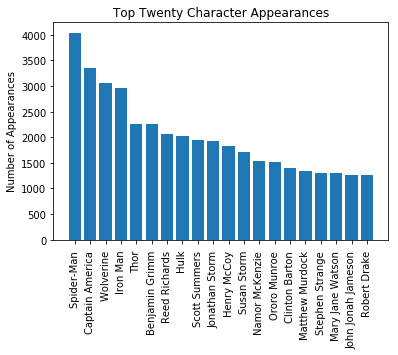

In [9]:
#let's create a df of the top twenty-five percent and inspect the top twenty of those
most_popular = df.loc[df.APPEARANCES >= 10].sort_index()
top_twenty = most_popular[:20]

#Let's only use their superhero names
names = top_twenty.name.str.split('(').tolist()
names = [tuple[0] for tuple in names]

#create bar chart
plt.bar(names, top_twenty.APPEARANCES)
plt.xticks(rotation='vertical')
plt.title('Top Twenty Character Appearances')
plt.ylabel('Number of Appearances')
plt.show()

Not surprising that the Marvel universe has a lot of single-movie-releases based on the top 5 :) Let's look at the gender breakdown of the top twenty.

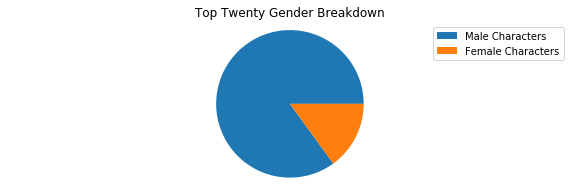

In [10]:
plt.figure(figsize=(10, 3))

plt.pie(top_twenty.SEX.value_counts())
plt.axis('equal')
plt.legend(top_twenty.SEX.value_counts().index, loc="upper right")
plt.title('Top Twenty Gender Breakdown')

plt.show()

There is an even greater gap between the number of men and women within the top twenty than there is of our overall dataset. Let's keep taking a look to see if this trend continues, and let's add another feature onto the list.

## 3. How frequently does each character appear? Appearances Per Year Analysis

It would be interesting to study the yearly appearances for different types of our data. Unfortunately, you can only perform this on characters who are still alive. They wouldn't continue writing for characters who are dead, right? Currently there is no stamp on the year that characters died, so we can't accurately know the number of years all characters were alive.

In [11]:
#create a new df based on the characters who are alive
living_characters = df.loc[df.ALIVE == 'Living Characters']
#create a new column for these characters that calculates their number of appearances per year
living_characters['appearances_per_year'] = living_characters.APPEARANCES / (2019 - living_characters.YEAR)

living_characters.describe()

c:\users\p-money's pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,page_id,APPEARANCES,YEAR,appearances_per_year
count,17808.000000,17808.000000,16602.000000,17059.000000,16050.000000
mean,6868.365454,257366.197552,20.280328,1986.915822,0.619372
std,4667.600551,231908.238114,104.485563,18.317434,2.189698
min,0.000000,1025.000000,1.000000,1935.000000,0.012048
25%,2996.000000,34099.000000,1.000000,1977.000000,0.058824
50%,5907.000000,193967.500000,4.000000,1991.000000,0.153846
75%,10617.250000,458813.000000,10.000000,2001.000000,0.433108
max,16375.000000,755278.000000,4043.000000,2013.000000,75.636364


I would love to jump straight into gender analysis based on this data. But there might be other reasons certain characters are written about more frequently than others. For example, are good characters written about more frequently than bad or neutral characters?

As we mentioned before, number of appearances is very top heavy in the comics world. It might only be useful to look at data of the most popular characters.

In [12]:
#Take a look at the most popular living characters characters
most_popular = living_characters.loc[df.APPEARANCES >= (living_characters.APPEARANCES.mean() + living_characters.APPEARANCES.std() * 2)]
most_popular.describe()

,index,page_id,APPEARANCES,YEAR,appearances_per_year
count,241.000000,241.000000,241.000000,238.000000,238.000000
mean,74.282158,10895.066390,629.107884,1970.218487,13.037076
std,50.422995,36040.548952,580.318121,14.701336,10.704687
min,0.000000,1029.000000,231.000000,1938.000000,3.089744
25%,32.000000,1592.000000,296.000000,1963.000000,6.810417
50%,67.000000,1935.000000,388.000000,1968.500000,9.338235
75%,113.000000,2626.000000,708.000000,1981.000000,15.556171
max,181.000000,403631.000000,4043.000000,2005.000000,75.636364


This seems like a more reasonable spread of data to work with, although still slightly top heavy. Let's see if the alignment of a character influences the number of appearances.

In [13]:
most_popular.groupby('ALIGN')['APPEARANCES', 'appearances_per_year'].describe()

APPEARANCES                                               \
                         count        mean         std    min    25%    50%   
ALIGN                                                                         
Bad Characters            15.0  414.133333  165.913862  247.0  306.0  332.0   
Good Characters          177.0  670.480226  615.745733  231.0  293.0  423.0   
Neutral Characters        39.0  591.282051  558.838408  231.0  298.5  353.0   

                                  appearances_per_year                        \
                      75%     max                count       mean        std   
ALIGN                                                                          
Bad Characters      510.0   721.0                 15.0   8.423650   4.289765   
Good Characters     850.0  4043.0                175.0  13.930917  11.025122   
Neutral Characters  681.0  3061.0                 38.0  12.369688  11.381049   

                                                                         
                         min       25%        50%        75%        max  
ALIGN                                                                    
Bad Characters      3.974026  5.979857   6.652174   9.384158  20.515152  
Good Characters     3.089744  7.073622  10.350877  17.076649  75.636364  
Neutral Characters  4.086207  6.698060   8.500000  15.211097  68.022222

It looks like the most popular characters' number of appearances isn't greatly affected by their alignment, but there are still far more good characters than bad or neutral characters. So let's look at the good characters and then see what the gender breakdown looks like.

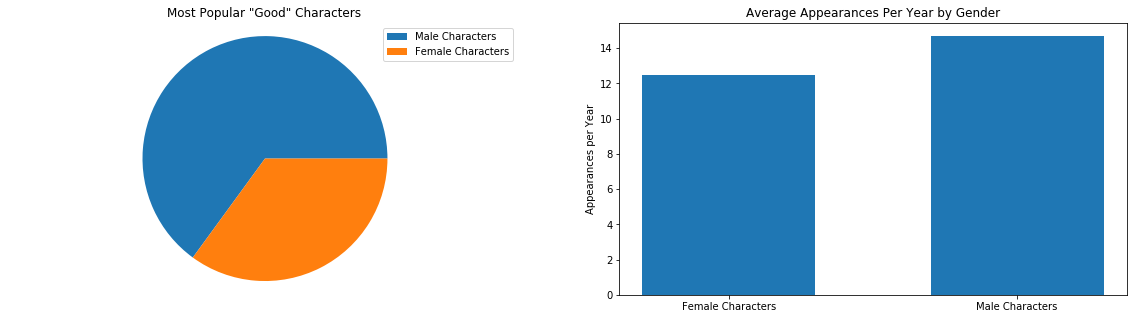

In [14]:
#create a most popular and good variable
mp_good = most_popular.loc[most_popular.ALIGN == 'Good Characters']

plt.figure(figsize=(20, 5))

#create a pie chart of the proportion of male/female characters
mpg_by_gender = mp_good.SEX.value_counts()
plt.subplot(1, 2, 1)
plt.pie(mpg_by_gender)
plt.axis('equal')
plt.legend(mpg_by_gender.index)
plt.title('Most Popular "Good" Characters')

#create a bar chart of the appearances per year by Gender
plt.subplot(1, 2, 2)
plt.bar(mp_good.groupby('SEX').describe().index, mp_good.groupby('SEX')['appearances_per_year'].mean(), width=0.6)
plt.title('Average Appearances Per Year by Gender')
plt.ylabel('Appearances per Year')

plt.show()

It looks like the most popular characters are mostly male, which seems to be representative of our entire dataset. Although, the female characters have almost as much frequency in their appearance as the male characters.

## Research Proposal

It seems like there is a disproportionately large amount of Male Characters compared with all other's. This seems to be indicative in the large population and only looking at the most popular characters.

It would be interesting to know if this is representative of the fans who are reading comics, the author's of the comics, or if this is simply coincidental. It could help to study other genres and see if this trend exists elsewhere. There is potential to inform the comic book industry and make predicitons if they are not attracting all potential demographics because of this.

More interesting could be the last 15-30 years of analysis. We've already seen that over half of all new comic book characters had their debut since 1990 and 25% since 2001 (most recent appearance is 2013 in this data). We could see if this gender representation imbalance exists in the most recent years as well.

Using this last 30 years as your data, it would be fun to create a model to predict the gender of a new character being made. For example, we know they're releasing a new dark haired villain with blue eyes? Odds are it's a...
Or we could predict the number of appearances we can expect a character to have based on all of their qualitative data.